<a href="https://colab.research.google.com/github/vaibram/Research/blob/main/ROHIT_HOMEWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/content/sample_data/PROCESSS.txt
Table output:
    SKU  Current Price  Sales  Return  Loss  Stocks
0     1          14.99     15       1     0      75
1     2           4.97      4       2     0      40
2     3           5.97      5       5     1      20
3     4           7.97      4       2     2      30
4     5           6.97      5       5     5      46
5     6           5.97      7       4     6      70
6     7           4.00      8       3     7      50
7     8           8.97      9       8     0      30
8     9           6.97      6       7     0      20
9    10           2.97      2       6     3      10
10   11           4.70      1       5     4      40
11   12           4.90      6       4     5      40

Data Description:
             SKU  Current Price      Sales     Return       Loss     Stocks
count  12.000000      12.000000  12.000000  12.000000  12.000000  12.000000
mean    6.500000       6.612500   6.000000   4.333333   2.750000  39.250000
std     3.605551       3.1340

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


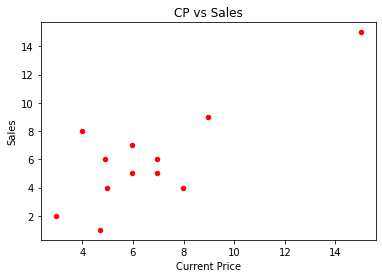


Bar Graph:


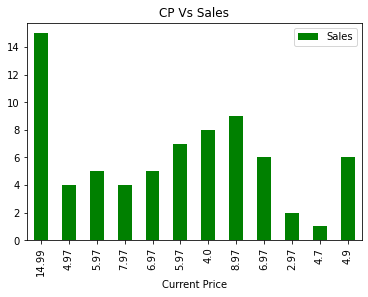

Line Plot:


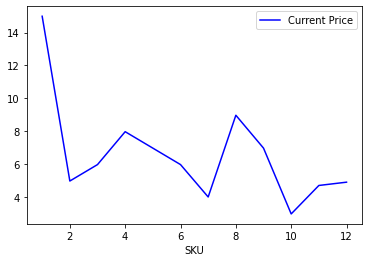

In [6]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.patches as mpatches
from sklearn import datasets
#Taking Input of the file path from the user to be analysed
#File can be of any type xlsx,csv or typed format (if condition given for that)
address = input("")
if "xlsx" in address:
  df = pd.read_excel(address)
elif "txt" in address:
  df = pd.read_csv(address, names=['SKU','Current Price','Sales','Return','Loss','Stocks'], header = 2,sep=',')
  #Text file cant develope the whole data structure hence assuing the data set to be of the same format the column names are assigned in the from of a list 
  df.reset_index(drop=True, inplace=True)
  df = df[['SKU','Current Price','Sales','Return','Loss','Stocks']]
elif "csv" in address:
  df = pd.read_csv(address,
                   header = 0)
print("Table output:")
print(df)
print()
print("Data Description:")
print(df.describe()) #Gives the mean,SD and normal distribution result for the input data
print()

#Stats Model to find all the data Coefficients
x = df['Current Price']
y = df['Sales']
x2 = sm.add_constant(x)#Including all the exceptions
ols = sm.OLS(y,x2)
est = ols.fit() #Fitting the model with the variables given y,x2
print("Stats Model Summary:")
print(est.summary())
#Linear Regression to find the best metric to measure in the data
x = df['Current Price'].values.reshape(-1,1) #Converting the dimension of the data for better calculation
y = df['Sales'].values
lr = LinearRegression(fit_intercept=True)
lr.fit(x,y)
y_pred = lr.predict(x)
print("Linear Regression output")
print('Coeff =',lr.coef_) #Very important to get quality data
print('Intercept =',lr.intercept_) 
print('R^2 =',lr.score(x,y)) #The error and the distance from the standard data which is 1
print('Root MSE =',math.sqrt(metrics.mean_squared_error(y,y_pred)))
print()
 #Shows the outlier and helps in finding the anamoly in the data 
df.plot(kind = 'scatter',
        x = 'Current Price',
        y = 'Sales',
        color = 'red')
print()
print("Scatter Plot:")
 #Being a numerical data and time based data the bar graph is used for finding the trend
plt.title('CP vs Sales') #As the main data plotting is requried between the CP and the sales(as shown in the Regression too)
plt.show()
df.plot(kind = 'bar',
        x = 'Current Price',
        y = 'Sales',
        color = 'green')
print()
print("Bar Graph:")
plt.title('CP Vs Sales')
plt.show()
ax = plt.gca() 
df.plot(kind = 'line',
        x = 'SKU',
        y = 'Current Price',
        color = 'Blue',ax = ax)
print("Line Plot:")
plt.show()
